In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)

In [24]:
j = 480
spectrum = fits.open(str(j)+"_test_off_limb_slit.fits")[0].data
taus = fits.open(str(j)+"_test_off_limb_slit.fits")[1].data
contrib = fits.open(str(j)+"_test_off_limb_slit.fits")[2].data


In [25]:
print(spectrum.shape)
print(taus.shape)
print (contrib.shape)

(256, 601)
(256, 601)
(256, 601, 1536)


In [26]:
wavelengths = np.linspace(393.06, 393.66, 601)
z = np.linspace(0,255,256)*32 # in km

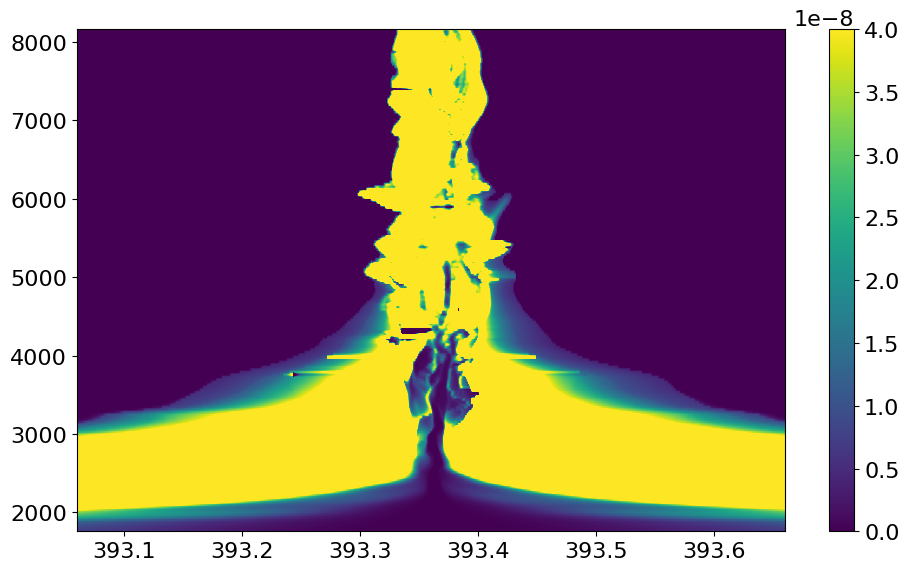

In [27]:
# And plot the image:
plt.figure(figsize=(10,6))
plt.imshow(spectrum[55:,:]*1E-3, origin='lower', aspect='auto',extent=[wavelengths[0],wavelengths[-1],z[55],z[-1]],vmin=0,vmax=4E-8)
plt.xlim(wavelengths[0], wavelengths[-1])
plt.ylim(z[55], z[-1])
plt.colorbar()
plt.tight_layout()
plt.savefig(str(j)+"test_off_limb_slit.png",bbox_inches='tight')

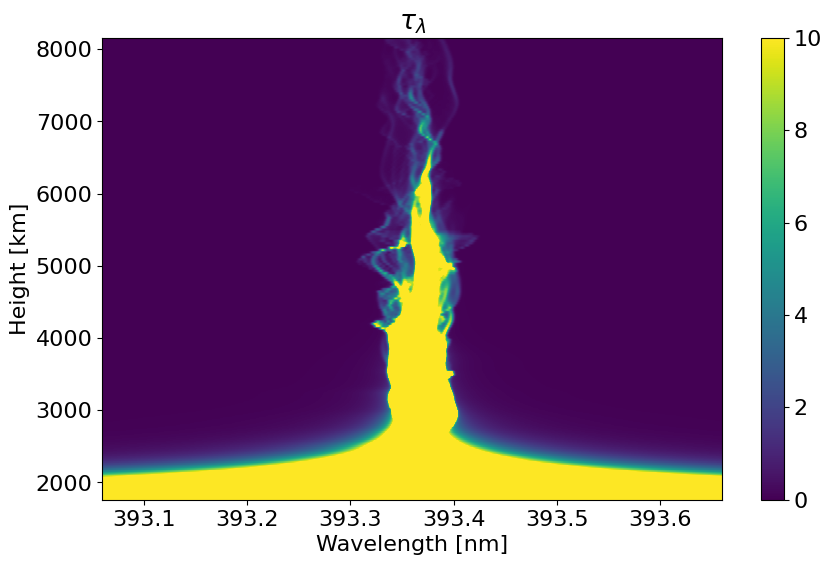

In [28]:
   # And the same for tau
plt.figure(figsize=(10,6))
plt.imshow(taus[55:,:], origin='lower', aspect='auto',extent=[wavelengths[0],wavelengths[-1],z[55],z[-1]],vmin=0,vmax=1E1)
plt.xlim(wavelengths[0], wavelengths[-1])
plt.ylim(z[55], z[-1])
plt.ylabel("Height [km]")
plt.xlabel("Wavelength [nm]")
plt.colorbar()
plt.title("$\\tau_\\lambda$")
plt.savefig(str(j)+"tau_off_limb_slit.png",bbox_inches='tight')


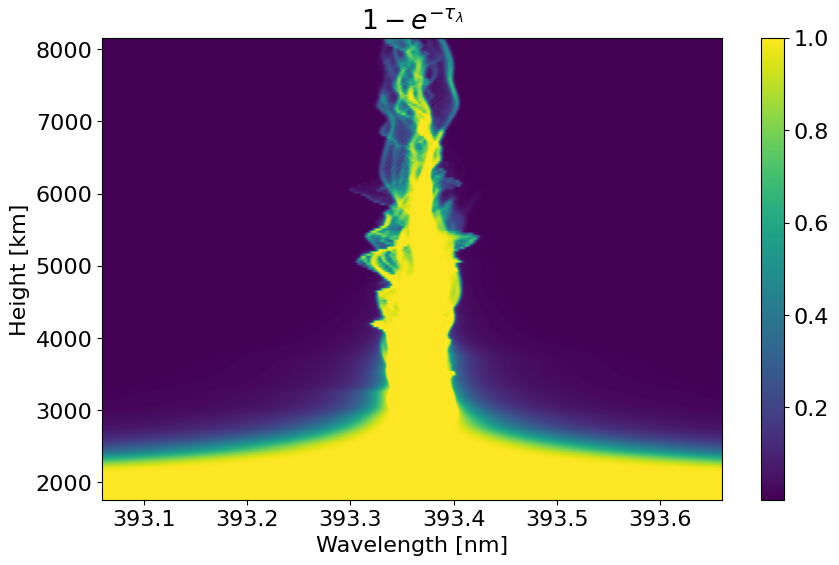

In [29]:
   # And the same for tau
plt.figure(figsize=(10,6))
plt.imshow((1.0 - np.exp(-taus[55:,:])), origin='lower', aspect='auto',extent=[wavelengths[0],wavelengths[-1],z[55],z[-1]])
plt.xlim(wavelengths[0], wavelengths[-1])
plt.ylim(z[55], z[-1])
plt.ylabel("Height [km]")
plt.xlabel("Wavelength [nm]")
plt.colorbar()
plt.title("$1-e^{-\\tau_\\lambda}$")
plt.savefig(str(j)+"transmission_off_limb_slit.png",bbox_inches='tight')

In [30]:
pops = fits.open("/dat/milic/SUSI_modeling/0_lwsynth_393.1._transposed.fits")[2].data.transpose(1,0,2,3) # to fix what we messed up earlier

In [31]:
pops.shape
pops_slice = pops[:,j,:,:] # Take a slice at y=j
print(pops_slice.shape)

(768, 6, 256)


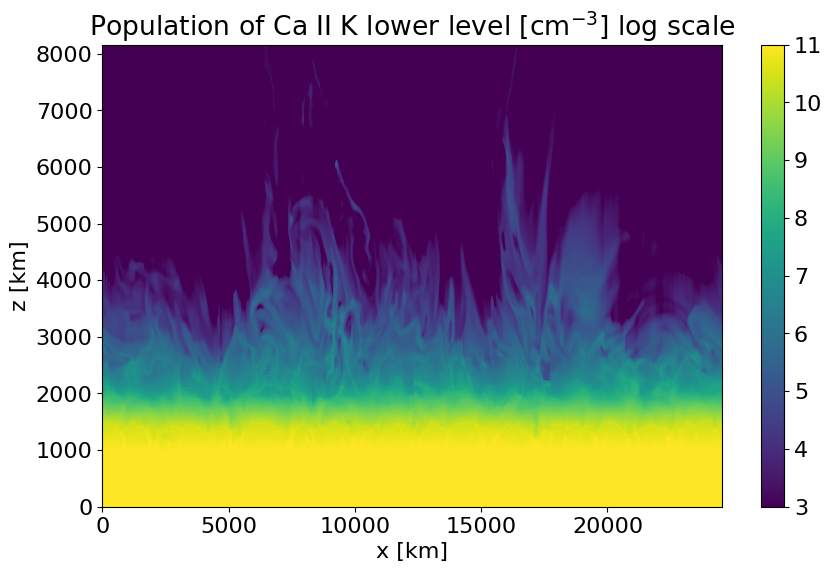

In [32]:
plt.figure(figsize=(10,6))
plt.imshow(np.log10(pops_slice[:, 2, ::-1]/1E6+1E-10).T, origin='lower', aspect='auto',extent=[0,767*32,0,255*32], vmin=3, vmax=11)
plt.colorbar()
plt.title("Population of Ca II K lower level [cm$^{-3}$] log scale")
plt.xlabel("x [km]")
plt.ylabel("z [km]")
plt.savefig(str(j)+"_pop_ca_ii_k_lower_off_limb.png",bbox_inches='tight')

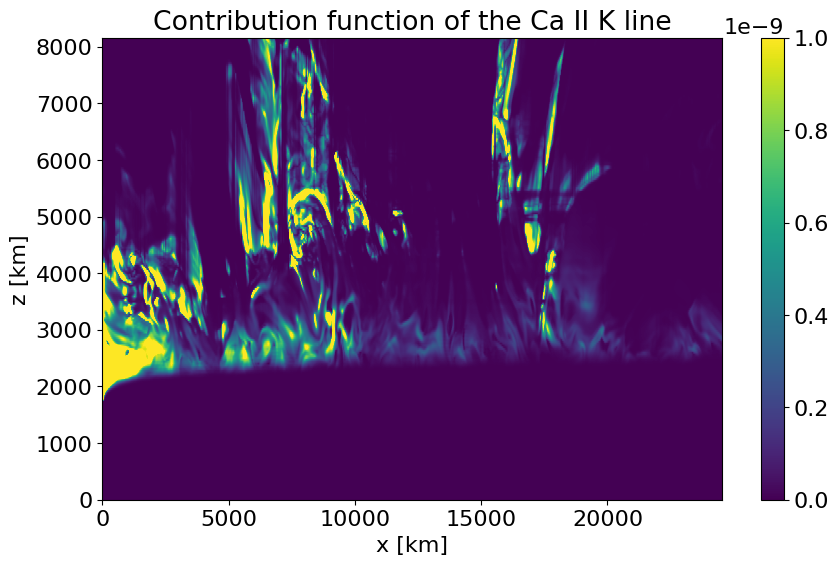

In [33]:
# Now let's plot the contribution here, for a given wavelengths: 
contrib.shape

plt.figure(figsize=(10,6))
plt.imshow((np.mean(contrib[:, 200:400, :],axis=1)), origin='lower', aspect='auto',extent=[0,767*32,0,255*32],vmin=0, vmax=1E-9)
plt.colorbar()
plt.title("Contribution function of the Ca II K line")
plt.xlabel("x [km]")
plt.ylabel("z [km]")
plt.savefig(str(j)+"_contrib_ca_ii_k_off_limb.png",bbox_inches='tight')

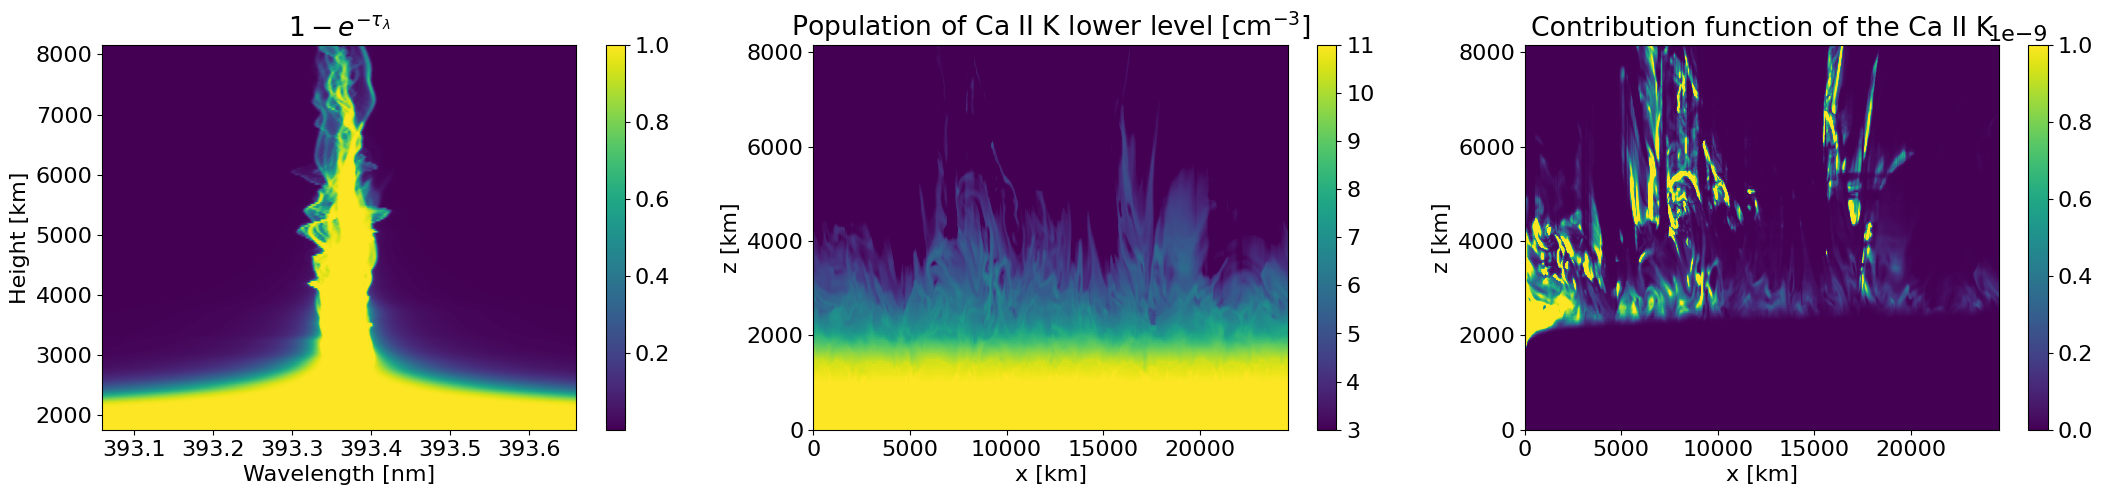

In [34]:
# Do a three-panel plot to summarize what we had above, also similar to what is below:

plt.figure(figsize=(26,5))
plt.subplot(1,3,1)
plt.imshow((1.0 - np.exp(-taus[55:,:])), origin='lower', aspect='auto',extent=[wavelengths[0],wavelengths[-1],z[55],z[-1]])
plt.xlim(wavelengths[0], wavelengths[-1])
plt.ylim(z[55], z[-1])
plt.ylabel("Height [km]")
plt.xlabel("Wavelength [nm]")
plt.colorbar()
plt.title("$1-e^{-\\tau_\\lambda}$")

plt.subplot(1,3,2)
plt.imshow(np.log10(pops_slice[:, 2, ::-1]/1E6+1E-10).T, origin='lower', aspect='auto',extent=[0,767*32,0,255*32], vmin=3, vmax=11)
plt.colorbar()
plt.title("Population of Ca II K lower level [cm$^{-3}$]")
plt.xlabel("x [km]")
plt.ylabel("z [km]")

plt.subplot(1,3,3)
plt.imshow((np.mean(contrib[:, 200:400, :],axis=1)), origin='lower', aspect='auto',extent=[0,767*32,0,255*32],vmin=0, vmax=1E-9)
plt.colorbar()
plt.title("Contribution function of the Ca II K")
plt.xlabel("x [km]")
plt.ylabel("z [km]")
plt.savefig(str(j)+"_3panelrt_ca_ii_k_off_limb.png",bbox_inches='tight')

In [35]:
# Now also load MURAM
import muram as mio

In [36]:
muram_path = "/dat/milic/SUSI_modeling"
id = 0
cube = mio.MuramSnap(muram_path, id)

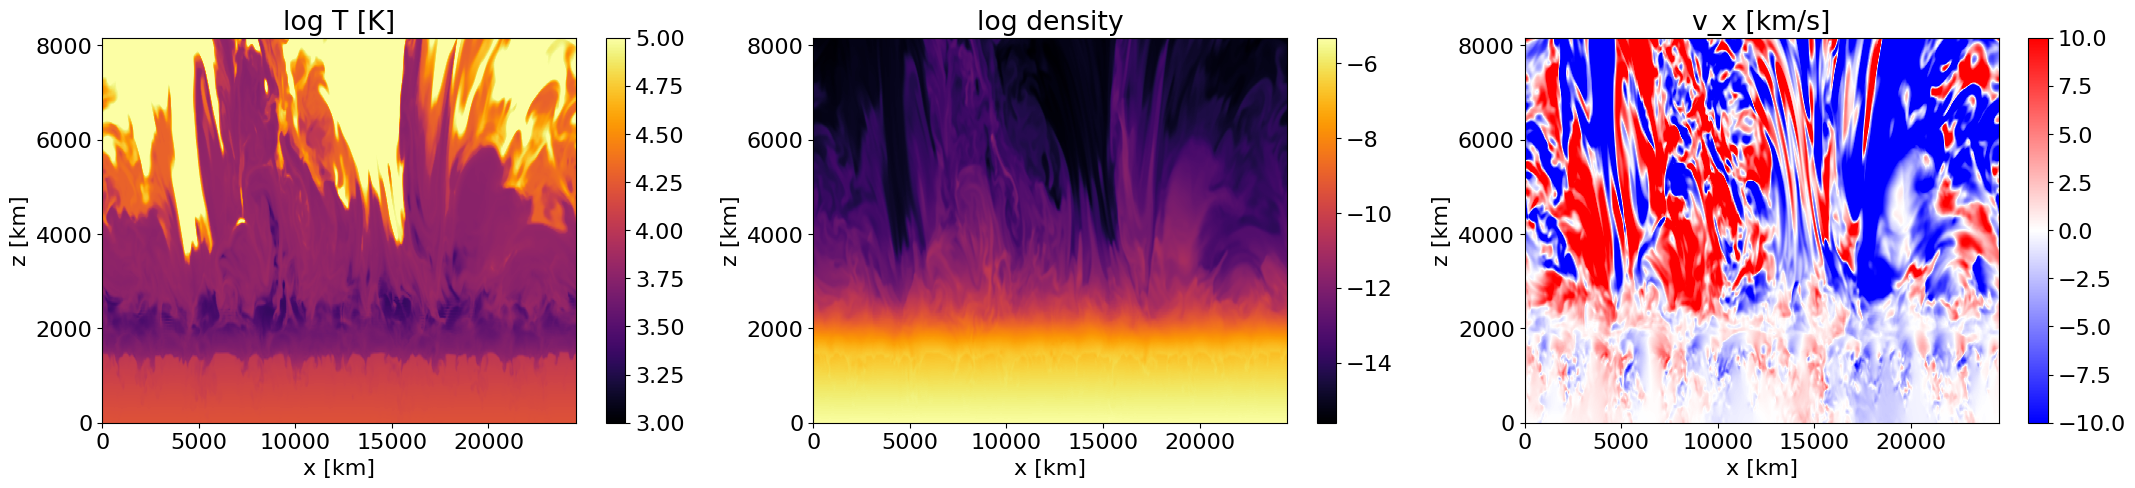

In [37]:
# Do temperature, pressure velocity in one 1 x plot:
plt.figure(figsize=(26,5))
plt.subplot(1,3,1)
T = cube.Temp.transpose(1,2,0)[:,j,150:406]
plt.imshow(np.log10(T).T, origin='lower', aspect='auto',extent=[0,767*32,0,255*32], cmap='inferno', vmin=3, vmax=5)
plt.colorbar()
plt.title("log T [K]")
plt.xlabel("x [km]")
plt.ylabel("z [km]")
plt.subplot(1,3,2)
rho = cube.rho.transpose(1,2,0)[:,j,150:406]
plt.imshow(np.log10(rho).T, origin='lower', aspect='auto',extent=[0,767*32,0,255*32], cmap='inferno')
plt.colorbar()
plt.title("log density")
plt.xlabel("x [km]")
plt.ylabel("z [km]")
plt.subplot(1,3,3)
vlos = cube.vy.transpose(1,2,0)[:,j,150:406]
plt.imshow(vlos.T/1E5, origin='lower', aspect='auto',extent=[0,767*32,0,255*32], cmap='bwr', vmin=-10, vmax=10)
plt.colorbar()
plt.title("v_x [km/s]")
plt.xlabel("x [km]")
plt.ylabel("z [km]")

plt.savefig(str(j)+"_ca_ii_k__atmos_offlimblower_off_limb_"+str(j)+".png",bbox_inches='tight')

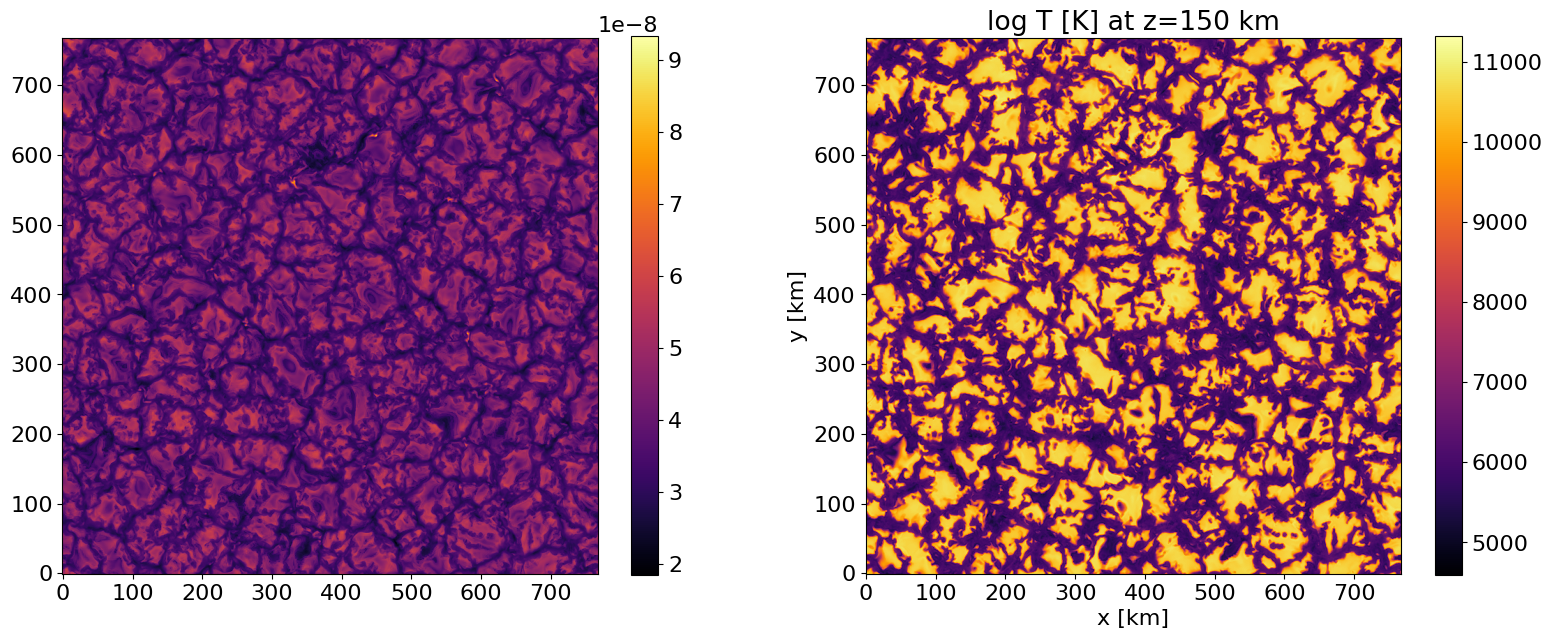

In [20]:
# Compare structure:

spectrum_disk_center= fits.open("/dat/milic/SUSI_modeling/0_lwsynth_393.1._transposed.fits")[0].data
plt.figure(figsize=(19,7))
plt.subplot(121)
plt.imshow(spectrum_disk_center[:,:,0,-3],origin='lower',cmap='inferno')
plt.colorbar()

plt.subplot(122)
Temp = mio.MuramSnap(muram_path, id).Temp
Temp = Temp.transpose(1,2,0)
plt.imshow((Temp[:,:,193].T), origin='lower', cmap='inferno')
plt.colorbar()
plt.title("log T [K] at z=150 km")
plt.xlabel("x [km]")
plt.ylabel("y [km]")
plt.savefig("T_ca_ii_k_lower_xy_slice_z150.png")

In [ ]:
# Do a check with vx, vy:
vy = cube.vy.transpose(1,2,0)
Bz = cube.

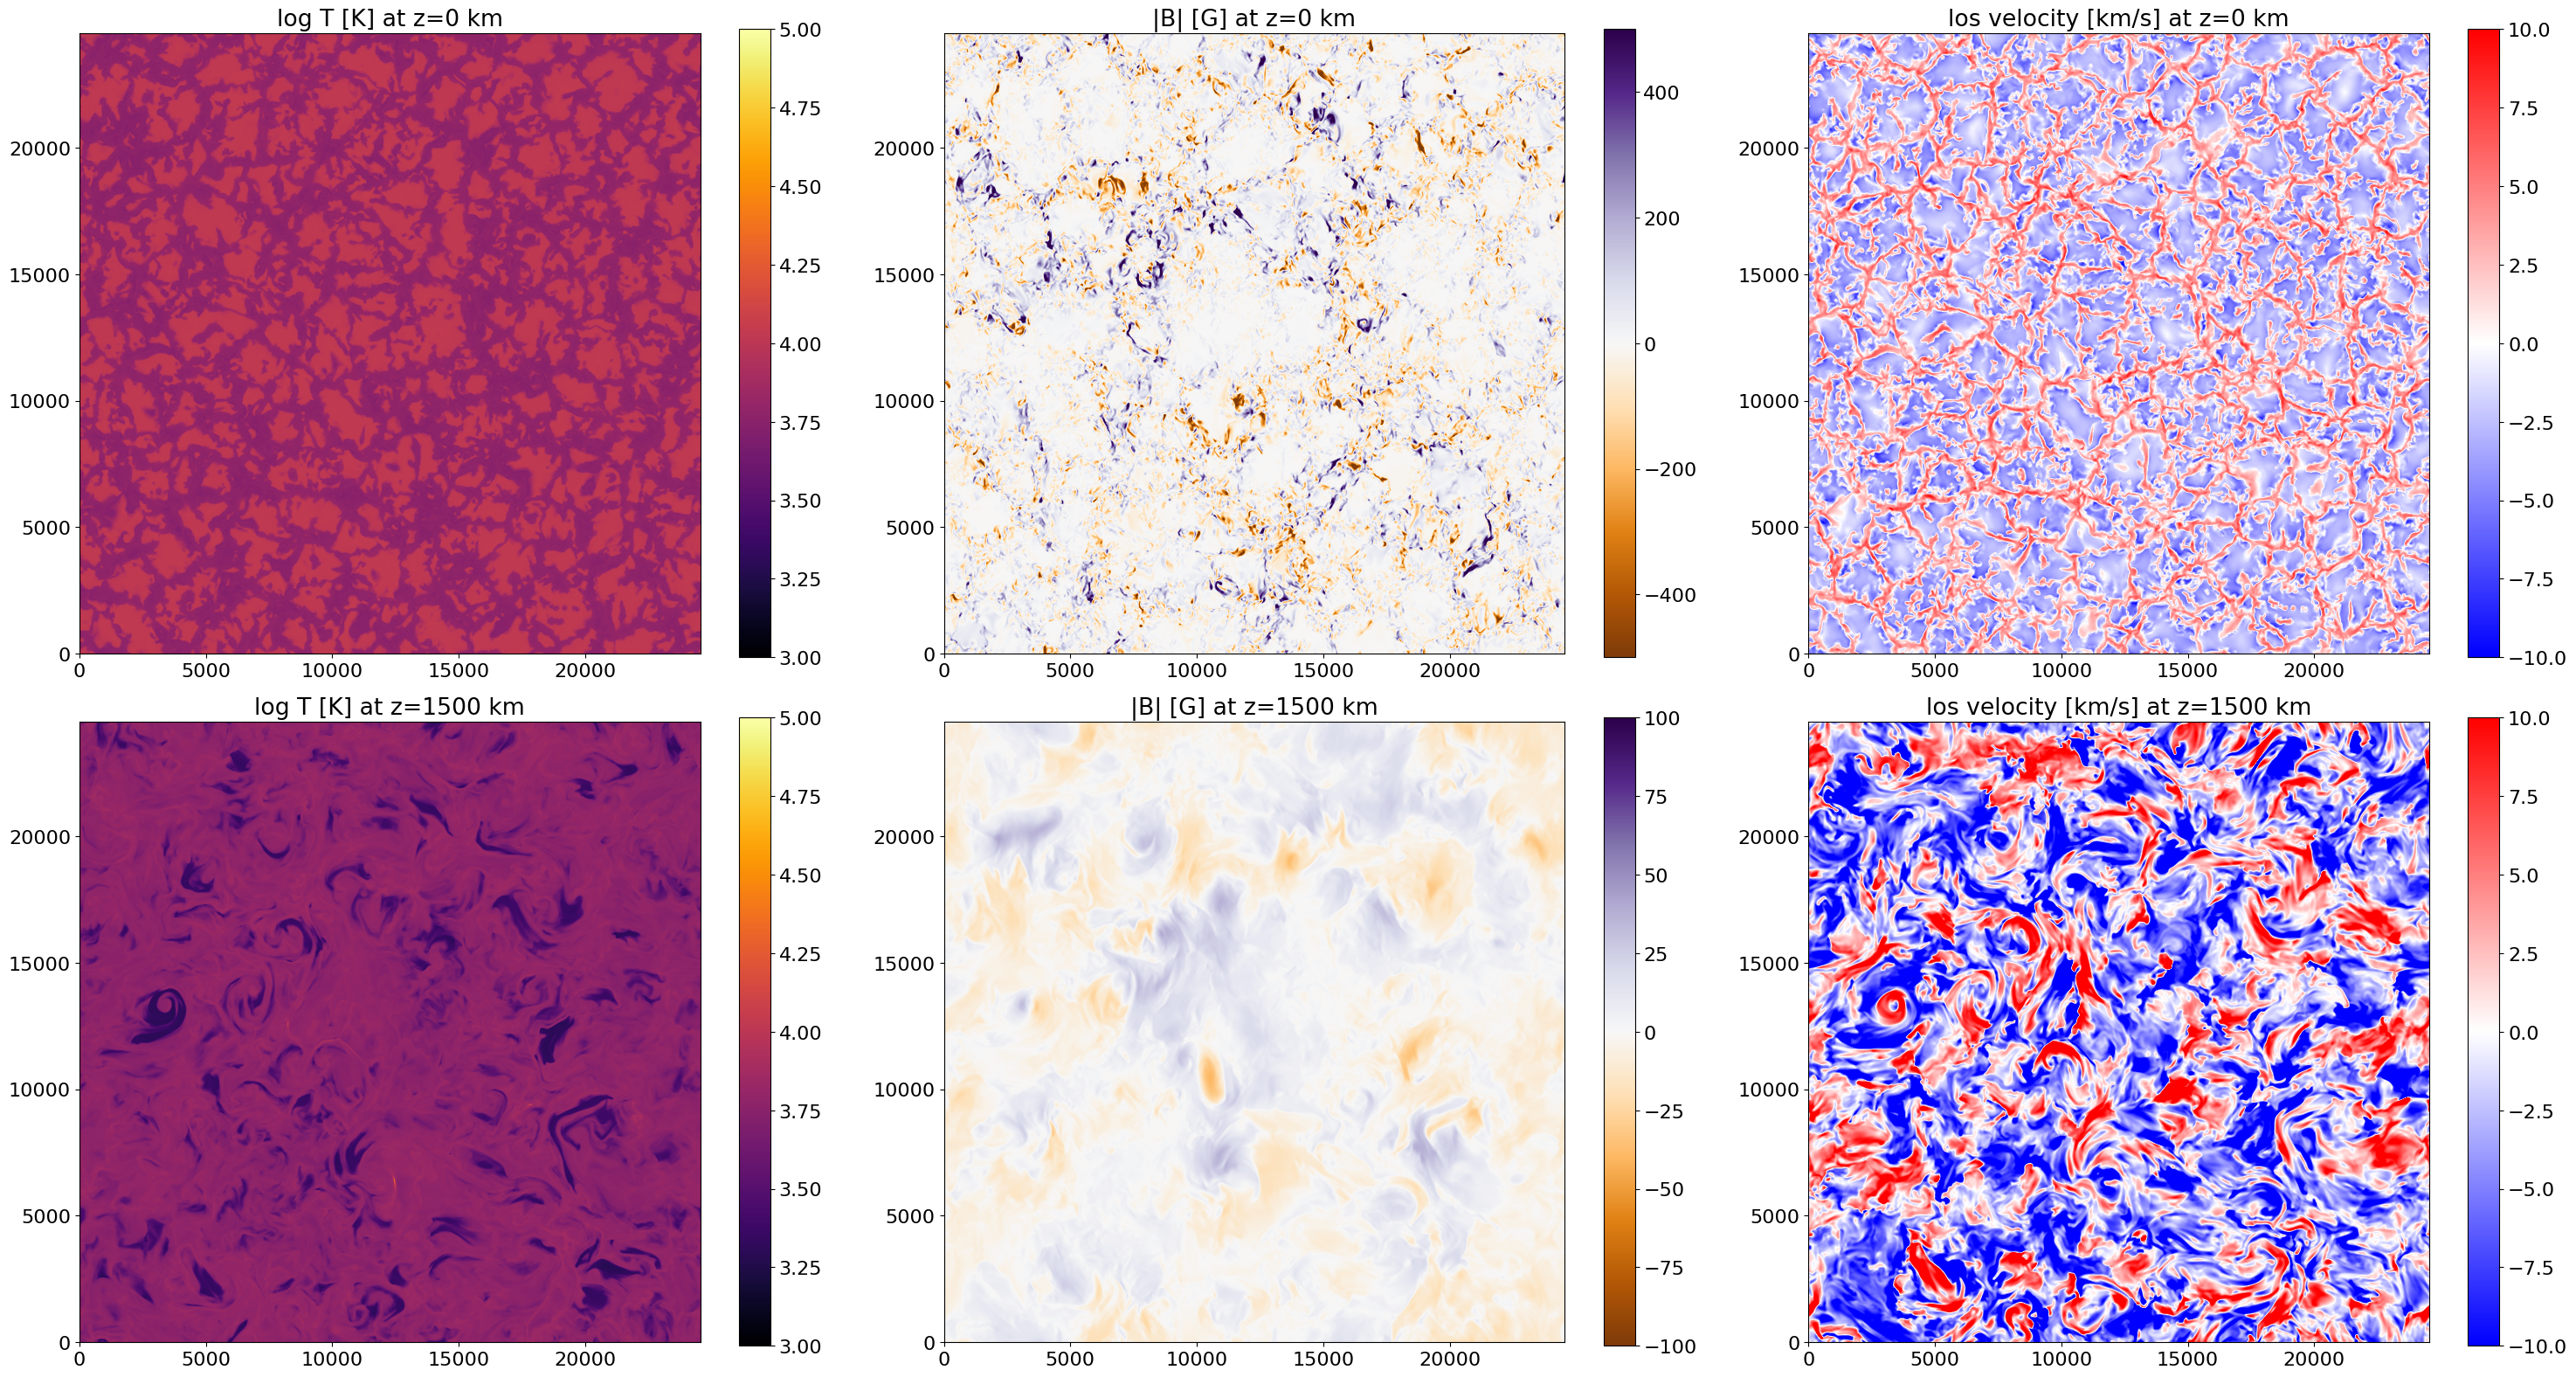

In [145]:
# 3x2 plot for the presentation, showing temperature, magnetic field and velocity at two heights
plt.figure(figsize=(30,16))
plt.subplot(231)
plt.imshow(np.log10(cube.Temp.transpose(1,2,0)[:,:,193]).T, origin='lower', extent=[0,767*32,0,767*32], cmap='inferno', vmin=3, vmax=5)
plt.colorbar()
plt.title("log T [K] at z=0 km")
plt.subplot(232)
plt.imshow((cube.Bz.transpose(1,2,0)[:,:,193]).T*np.sqrt(4.0*3.14), origin='lower', extent=[0,767*32,0,767*32], cmap='PuOr', vmin=-500, vmax=500)
plt.colorbar()
plt.title("|B| [G] at z=0 km")
plt.subplot(233)
plt.imshow(-cube.vx.transpose(1,2,0)[:,:,193].T/1E5, origin='lower', extent=[0,767*32,0,767*32], cmap='bwr', vmin=-10, vmax=10)
plt.colorbar()
plt.title("los velocity [km/s] at z=0 km")
plt.subplot(234)
plt.imshow(np.log10(cube.Temp.transpose(1,2,0)[:,:,193+48]).T, origin='lower', extent=[0,767*32,0,767*32], cmap='inferno', vmin=3, vmax=5)
plt.colorbar()
plt.title("log T [K] at z=1500 km")
plt.subplot(235)
plt.imshow((cube.Bz.transpose(1,2,0)[:,:,193+48]).T*np.sqrt(4.0*3.14), origin='lower', extent=[0,767*32,0,767*32], cmap='PuOr', vmin=-100, vmax=100)
plt.colorbar()
plt.title("|B| [G] at z=1500 km")
plt.subplot(236)
plt.imshow(cube.vx.transpose(1,2,0)[:,:,193+48].T/1E5, origin='lower', extent=[0,767*32,0,767*32], cmap='bwr', vmin=-10, vmax=10)
plt.colorbar()
plt.title("los velocity [km/s] at z=1500 km")
plt.tight_layout()
plt.savefig("xy_2heights.png", bbox_inches='tight')
